## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()


2023-04-29 12:22:25.544539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ["EIN", "NAME"])
application_df


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Review the data type information
application_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [4]:
# Determine the number of unique values in each column.
application_df.apply(pd.Series.nunique)


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning

application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

# Choose a cutoff value and create a list of classifications to replace with 'Other'
cutoff_value = 500
application_types_to_replace = list(application_type_counts[application_type_counts < cutoff_value].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"OTHER")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()




T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
OTHER      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning

classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_2 = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].
                                                                          value_counts() > 1]
classification_counts_2


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

# Choose a cutoff value and create a list of classifications to replace with 'Other'
cutoff_value = 300
classifications_to_replace = list(classification_counts[classification_counts < cutoff_value].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"OTHER")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()




C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
OTHER     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION',
                                                        'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION',
                                                        'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])
application_df



,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Reorder columns to place "IS_SUCCESSFUL" as the last column
# application_df = application_df.[[]]

application_df = application_df[[col for col in application_df if col != 'IS_SUCCESSFUL'] + ['IS_SUCCESSFUL']]
application_df


,STATUS,ASK_AMT,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,IS_SUCCESSFUL
0,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,108590,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,6692,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,1,142590,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34297,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [12]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34299 non-null  int64
 1   ASK_AMT                       34299 non-null  int64
 2   APPLICATION_TYPE_OTHER        34299 non-null  uint8
 3   APPLICATION_TYPE_T10          34299 non-null  uint8
 4   APPLICATION_TYPE_T19          34299 non-null  uint8
 5   APPLICATION_TYPE_T3           34299 non-null  uint8
 6   APPLICATION_TYPE_T4           34299 non-null  uint8
 7   APPLICATION_TYPE_T5           34299 non-null  uint8
 8   APPLICATION_TYPE_T6           34299 non-null  uint8
 9   APPLICATION_TYPE_T7           34299 non-null  uint8
 10  APPLICATION_TYPE_T8           34299 non-null  uint8
 11  AFFILIATION_CompanySponsored  34299 non-null  uint8
 12  AFFILIATION_Family/Parent     34299 non-null  uint8
 13  AFFILIATION_Independent       3

In [13]:
# Split our preprocessed data into our features and target arrays
# Convert input to numpy array
np_application_df = application_df.to_numpy()

X_data = np_application_df[:,0:44]
y_data= np_application_df[:,44]

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split( X_data, y_data, random_state=1)
  

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
from tensorflow import keras

    
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 16
hidden_nodes_layer4 = 6
hidden_nodes_layer5 = 26

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer1, 
    input_dim=number_input_features, 
    activation="tanh"))

# Second hidden layer
model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="tanh"))

# Third hidden layer
model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, 
    activation="tanh"))

# Fourth hidden layer
model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer4, 
    activation="tanh"))

# Fifth hidden layer
model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer5, 
    activation="tanh"))

# Output layer
model.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"))

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                720       
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
 dense_2 (Dense)             (None, 16)                112       
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
 dense_4 (Dense)             (None, 26)                182       
                                                                 
 dense_5 (Dense)             (None, 1)                 27        
                                                                 
Total params: 1,245
Trainable params: 1,245
Non-trainabl

In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


Training Progress:
------------------------------------
Epoch 1/20
644/644 [==============================] - 2s 2ms/step - loss: 0.5912 - accuracy: 0.7059 - val_loss: 0.5630 - val_accuracy: 0.7275
Epoch 2/20
644/644 [==============================] - 1s 1ms/step - loss: 0.5643 - accuracy: 0.7251 - val_loss: 0.5519 - val_accuracy: 0.7357
Epoch 3/20
644/644 [==============================] - 1s 1ms/step - loss: 0.5589 - accuracy: 0.7268 - val_loss: 0.5514 - val_accuracy: 0.7318
Epoch 4/20
644/644 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7277 - val_loss: 0.5473 - val_accuracy: 0.7351
Epoch 5/20
644/644 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7281 - val_loss: 0.5454 - val_accuracy: 0.7368
Epoch 6/20
644/644 [==============================] - 1s 1ms/step - loss: 0.5530 - accuracy: 0.7288 - val_loss: 0.5469 - val_accuracy: 0.7362
Epoch 7/20
644/644 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy

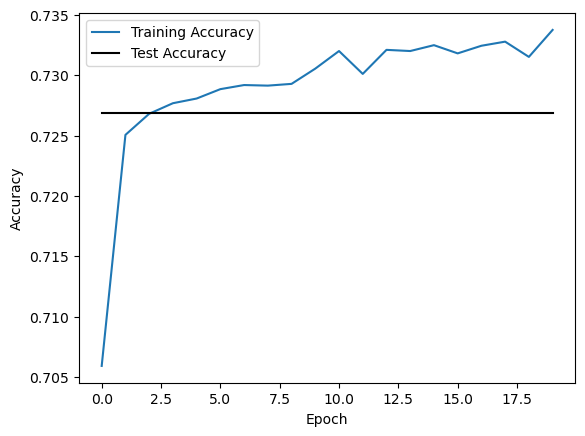


Evaluation against Test Dataset :
------------------------------------
268/268 [==============================] - 0s 912us/step - loss: 0.5543 - accuracy: 0.7269


[0.5543358325958252, 0.7268804907798767]

In [18]:
# Train the model
# Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=32
#Set number of epochs
EPOCHS=20
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train_scaled,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training and Test Dataset :\n------------------------------------")
import matplotlib.pyplot as plt

# Evaluate the model against the test dataset
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot accuracy of the model after each epoch on both training and test sets
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot([0, EPOCHS-1], [test_accuracy, test_accuracy], 'k-', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend()
plt.show()


#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test_scaled,y_test)

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



268/268 - 0s - loss: 0.5543 - accuracy: 0.7269 - 216ms/epoch - 806us/step
Loss: 0.5543358325958252, Accuracy: 0.7268804907798767


In [20]:
# Export our model to HDF5 file
model.save('AlphabetSoupCharity_optimized.h5')